In [2]:
!pip install boto3 --quiet
!pip install langchain --quiet

In [3]:
import boto3
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_community.chat_models import BedrockChat


boto_session = boto3.Session(profile_name="sandbox", region_name="us-west-2")
bedrock_runtime=boto_session.client(service_name="bedrock-runtime")

model_id = "anthropic.claude-3-sonnet-20240229-v1:0"

model_kwargs =  { 
    "max_tokens": 2048,
    # "temperature": 0.0,
    # "top_k": 250,
    # "top_p": 1,
}

model = BedrockChat(
    client=bedrock_runtime,
    model_id=model_id,
    model_kwargs=model_kwargs,
)

In [4]:
import base64
from pathlib import Path

image_path = Path("../samples/Coles.png")
image_base64 = base64.b64encode(image_path.read_bytes()).decode("utf-8")


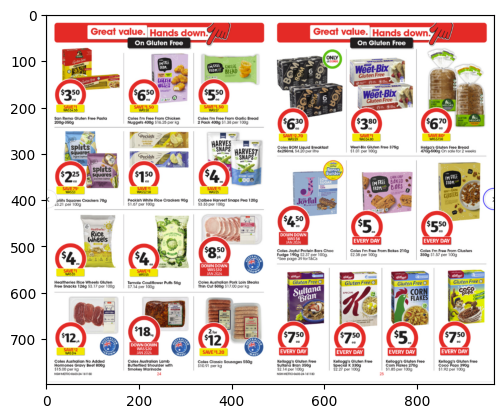

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(image_path)
plt.imshow(image)

In [9]:
from langchain_core.prompts import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate
)

system_prompt = "You are a helpful assistant."
system_message_template = SystemMessagePromptTemplate.from_template(system_prompt)

human_prompt = [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/png;base64,{image_base64}",
                },
            },
            {   
                "type": "text",
                "text": "{question}"
            },
        ]

human_message_template = HumanMessagePromptTemplate.from_template(human_prompt)

prompt = ChatPromptTemplate.from_messages(
    [
        system_message_template,
        human_message_template
    ]
)

chain = prompt | model | StrOutputParser()

# response = chain.invoke({"question": "Describe the pictures"})
# print(response)

for chunk in chain.stream({"question": "Describe the picture"}):
    print(chunk, end="", flush=True)


This image appears to be a grocery store advertisement or flyer featuring a variety of gluten-free food products and their prices. The header prominently displays "Great value. Hands down. On Gluten Free" in a red banner.

The products shown include gluten-free pasta, crackers, snacks, bread, sausages, luncheon meats, and other packaged items from various brands. The prices are clearly marked in red circles or red text boxes, indicating discounts or special offers on these gluten-free items.

It seems to be catering to customers looking for affordable gluten-free options across different categories like pasta, snacks, breads, and meats. The layout presents the products in a grid format with product images and pricing information for easy browsing.